In [36]:
#import google finance data from quandl
import quandl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')
import pandas as pd
import yfinance as yf

In [7]:
pip install quandl


  Using cached Quandl-3.7.0-py2.py3-none-any.whl (26 kB)
Note: you may need to restart the kernel to use updated packages.


In [22]:
#call a matrix of all the data for Apple and Google stocks
aaplall = yf.download("AAPL", start_date="2015-01-01", end_date="2020-01-01")

tslaall = yf.download("TSLA", start_date="2015-01-01", end_date="2020-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [24]:
#create the vector for prices at CLOSE
aapl = aaplall["Close"]
tsla = tslaall["Close"]
aaplall.head(5)
tslaall.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [25]:
#calculate the simple moving average for a short period
short_sma_aapl = aapl.rolling(window=20).mean()
#calculate the simple moving average for a long period
long_sma_aapl = aapl.rolling(window=100).mean()

In [26]:
#sma for tesla as well
short_sma_tsla = tsla.rolling(window=20).mean()
long_sma_tsla = tsla.rolling(window=100).mean()

In [ ]:
#Crossover Trading Strategy (using two SMA):
# when the shorter-term MA crosses above the longer-term MA, it is a BUY signal
# when the longer-term MA crosses above the shorter-term MA, it is a SELL signal

In [37]:
#Create Signal for Apple
signals1 = pd.DataFrame(index=aaplall.index)
signals1['signal'] = 0.0
signals1['signal'][20:] = np.where(short_sma_aapl[20:] > long_sma_aapl[20:], 1.0, 0.0)
signals1['positions'] = signals1['signal'].diff()


In [28]:
#Create Signal for Tesla
signals2 = pd.DataFrame(index=tslaall.index)
signals2['signal'] = 0.0
signals2['signal'][20:] = np.where(short_sma_tsla[20:]>long_sma_tsla[20:], 1.0, 0.0)
signals2['positions'] = signals2['signal'].diff()

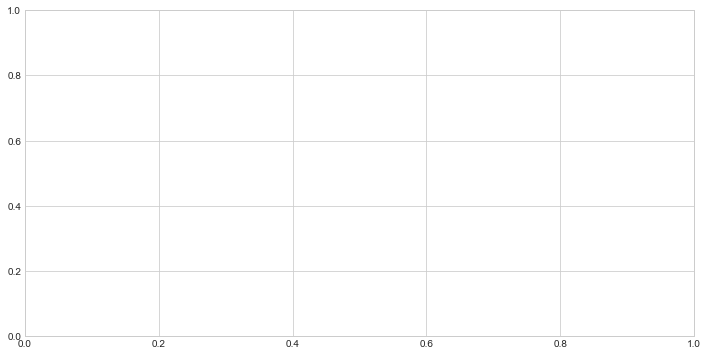

In [38]:
#create a plot of the data
fig, ax = plt.subplots(figsize=(12,6))

In [39]:
#plot apple data
ax.plot(aapl.index, aapl, label='AAPL')
ax.plot(short_sma_aapl.index, short_sma_aapl, label='20 days SMA')
ax.plot(long_sma_aapl.index, long_sma_aapl, label='100 days SMA')


In [30]:
#plot tesla data
ax.plot(tsla.index, tsla, label='TSLA')
ax.plot(short_sma_tsla.index, short_sma_tsla, label='20 days SMA')
ax.plot(long_sma_tsla.index, long_sma_tsla, label='100 days SMA')


In [31]:
#Plot the Buy Signals
ax.plot(signals1.loc[signals1.positions == 1.0].index,
        short_sma_aapl[signals1.positions == 1.0],
        '^', markersize=15,color='g')
ax.plot(signals2.loc[signals2.positions == 1.0].index,
        short_sma_tsla[signals2.positions == 1.0],
        '^', markersize=15,color='g')

In [32]:
#Plot the Sell Signals
ax.plot(signals1.loc[signals1.positions == -1.0].index,
        short_sma_aapl[signals1.positions == -1.0],
        'v', markersize=15,color='r')
ax.plot(signals2.loc[signals2.positions == -1.0].index,
        short_sma_tsla[signals2.positions == -1.0],
        'v', markersize=15,color='r')

In [34]:
#label the graph
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price ($)')
ax.legend()

In [33]:
#show the graph
plt.show()